<a href="https://colab.research.google.com/github/Rerzd/Ibm_data_science_notes/blob/main/Coursera_Data_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Pricing of used cars

in the previous notebook, we learned how to clean datasets based on the data we need, the data we dont need, and how we can replace null values without affecting the "behaviour" of the results in the columns.

Now it is time to apply descriptive statistics in order to demosntrate possible correlations once the results are clean

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [ ]:
df = pd.read_csv(file_path, header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
df.dtypes

,0
symboling,int64
normalized-losses,int64
make,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64
length,float64


In [ ]:
# In case we want to look only at one

df.dtypes['peak-rpm']

dtype('float64')

In [ ]:
#Let's calculate the correlation between variables of type int64 or float64 using corr
numeric_df = df.select_dtypes(include=["float64", "int64"])
numeric_df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [ ]:
# Correlation betwwn bore, stroke, compression-ratio and horsepower
num_car_df = df[['bore','stroke','compression-ratio','horsepower']]
num_car_df.corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


(0.0, 53232.460398372605)

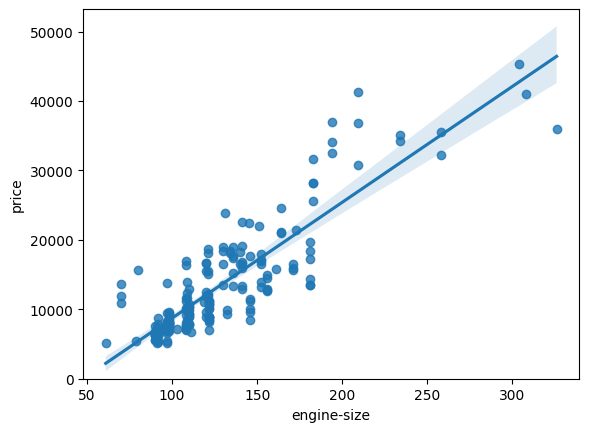

In [ ]:
#Positive linear relationship: We must find the scatterplot of "engine-size" and "price"
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [ ]:
# To see the value of the correlation more specifically
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

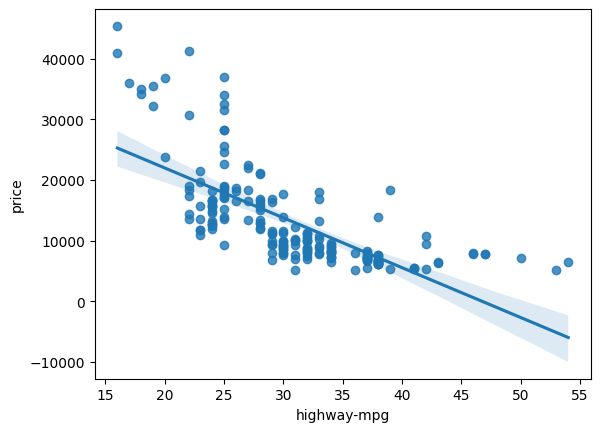

In [ ]:
# Negative linear relationship: Let's look at another potential predictor variable of price
sns.regplot(x='highway-mpg', y='price', data=df)

In [ ]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

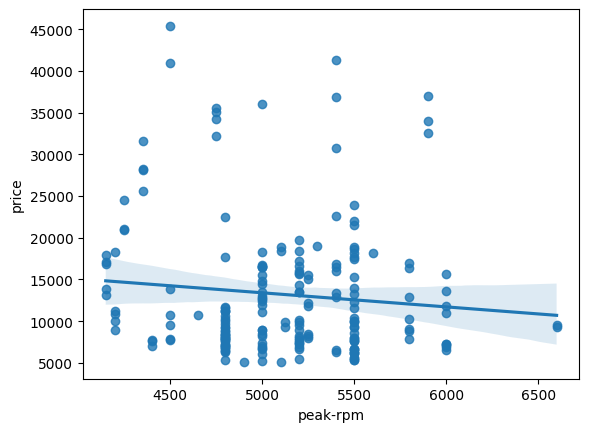

In [ ]:
# Weak Linear Relationship
sns.regplot(x="peak-rpm", y="price", data=df)

In [ ]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<Axes: xlabel='stroke', ylabel='price'>

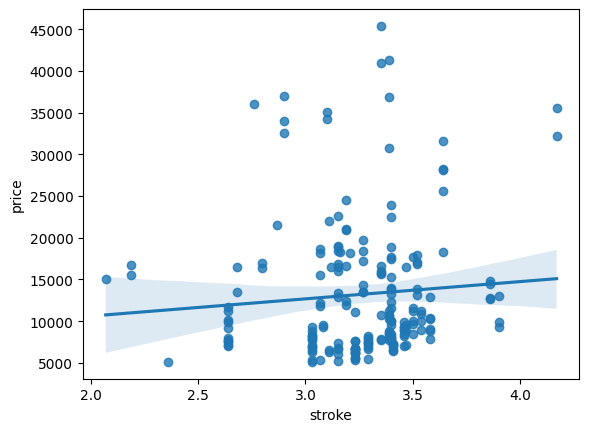

In [ ]:
# Now let's see the correlation between stroke and price
sns.regplot(x='stroke', y='price', data=df)

In [ ]:
# Given the visual results and correlation value, we con conclude that stroke and price have a waek psoitive correlationship
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


### Categorical values
This kind of values describe a characteristic of a data unit and are selected from a small group of categories. This can be type object or int64, we can visualize the with boxplots

<Axes: xlabel='body-style', ylabel='price'>

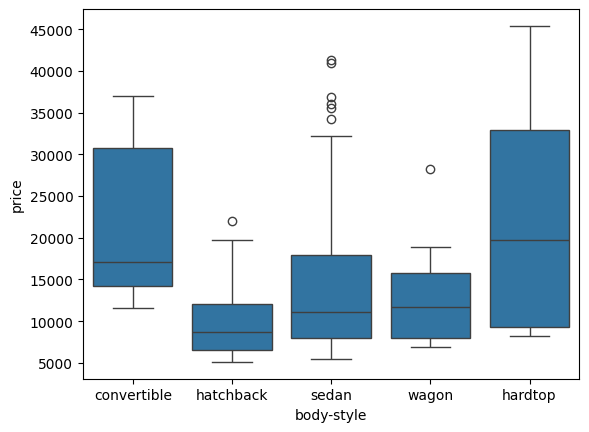

In [ ]:
# Let's compare the body style with the price
sns.boxplot(x="body-style", y= "price", data= df)

#As we can see, the distributions between the different body-style categories and price have a significant overlap
# For that reason, body-style is not a good predictor

<Axes: xlabel='engine-location', ylabel='price'>

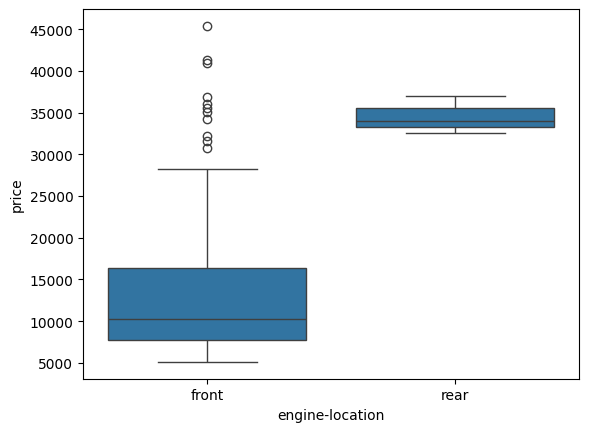

In [ ]:
#Let's take a look with the engine location instead
sns.boxplot(x="engine-location", y="price", data=df)
#they are on very different

<Axes: xlabel='drive-wheels', ylabel='price'>

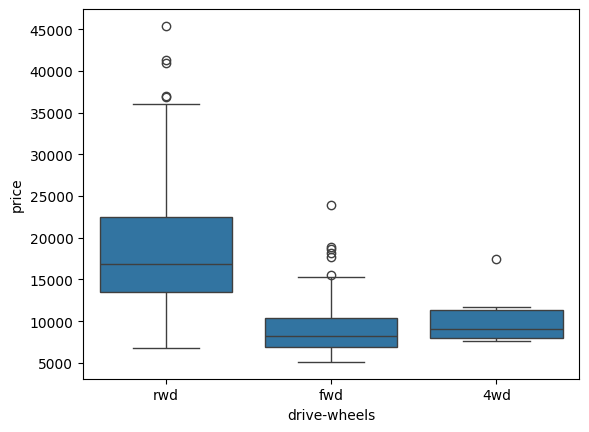

In [ ]:
# Let's take a look with "drive-wheels" and "price"
sns.boxplot(x="drive-wheels", y="price", data=df)

### Descriptive statistical analysis

as we saw before. using .describe() gives us as a result a lot of statistical data from the dataset. this applies only for the numerical data and forgets about NaN values

In [ ]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [ ]:
#In case we watn to look at type .object() varaibles

df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [ ]:
# We can also look how many units of a characteristic/variable we have with value_counts()
df['drive-wheels'].value_counts()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [ ]:
#We can convert the series to a dataframe
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [ ]:
#Again but let's save it in a variable and change the name
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.reset_index(inplace = True)
drive_wheels_counts = drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'})
drive_wheels_counts

,value_counts,count
0,fwd,118
1,rwd,75
2,4wd,8


In [ ]:
#Rename the index to 'drive-wheels'
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts,count
drive-wheels,,
0,fwd,118
1,rwd,75
2,4wd,8


In [ ]:
#Engine locations as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location':'value_counts '}, inplace = True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


### Grouping

Groupby makes the data group in different categories. based on one or several variables, and analysis is performed on the individual groups

In [ ]:
# Let's group the variable 'drive-wheels'. There are 3 different categories of drive wheels
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [ ]:
#We want to know which type of drive wheel is most valuable. so let's group them and then avg them

df_group_one = df[['drive-wheels','body-style','price']]

#Grouping results
df_grouped = df_group_one.groupby(['drive-wheels'], as_index = False).agg({'price': 'mean'})
df_grouped

#The resutls dropped that the rear wheel drive vehicles are, on average, the most expensive ones

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [ ]:
# Let's try grouping more varibles
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test_1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index = False,).mean()
grouped_test_1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [ ]:
# Data is much easier to visualize in a pivot table
grouped_pivot = grouped_test_1.pivot(index = 'drive-wheels', columns = 'body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [ ]:
# When we don't have data for some of the pivot cells. We can fill these missing cells with 0
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [ ]:
# use "groupby" to find the average "price" of each car cased on "body-style"
grouped_test_2 = df_gptest.groupby(['body-style'], as_index = False).agg({'price':'mean'})
grouped_test_2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


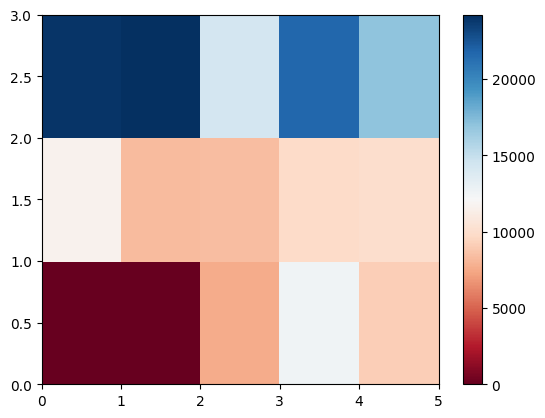

In [ ]:
# Drive wheels and body style vs price using a heatmap
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

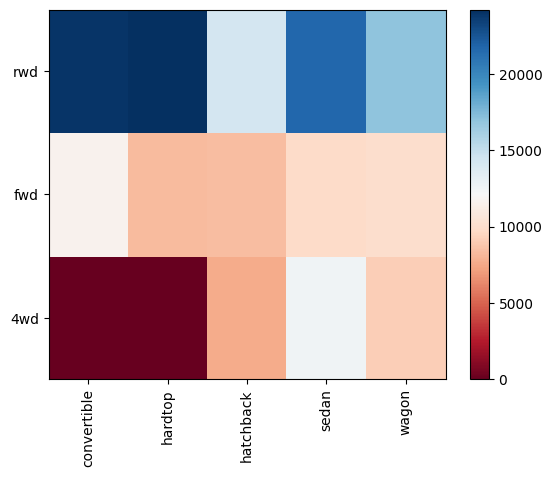

In [ ]:
# Since the default labels convey no useful info to ud, we have to adjust some details

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#Move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#Rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### Correlation adn causation

correlation: a measure of the extent of interdependance between variables

causation: Relationship between casue and effect between two variables

**1**:  perfect positive linear correlation

**0**:  No correlation

**-1**: Perfect negative linear correlation

In [ ]:
#Example
df.select_dtypes(include=['number']).corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


### P-value
it is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0,05 which means we are 95% confident that the correlation between variables is significant

By convention, when the

 p-value is 0.001: we say there is strong evidence that the correlation is significant.

the p-value is 0.05: there is moderate evidence that the correlation is significant.

the p-value is 0.1: there is weak evidence that the correlation is significant.

the p-value is 0.1: there is no evidence that the correlation is significant.

In [ ]:
from scipy import stats

In [ ]:
#Let's calculate the pearson correlation coefficient and P-value of 'wheel-base' and 'price'
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print(f"The pearson correlation coeficient is {pearson_coef} and it has a P-value of P = {p_value}")

#Correlation is statistically significant (p-value < 0.001) and  the linear realtionship is not strong (0,58~)

The pearson correlation coeficient is 0.584641822265508 and it has a P-value of P = 8.076488270732947e-20


In [ ]:
# Horsepower vs Price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print(f"The pearson correlation coeficient is {pearson_coef} and it has a P-value of P = {p_value}")

#Correlation is statistically significant (p-value < 0.001) and  the linear realtionship is quite strong (0.809)

The pearson correlation coeficient is 0.8095745670036562 and it has a P-value of P = 6.369057428259571e-48


In [ ]:
# Length vs Price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print(f"The pearson correlation coeficient is {pearson_coef} and it has a P-value of P = {p_value}")

# Correlation is statistically significant and the linear realtionship is quite moderate 0,69~

The pearson correlation coeficient is 0.6906283804483639 and it has a P-value of P = 8.016477466159241e-30


In [ ]:
# Width vs price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print(f"The pearson correlation coeficient is {pearson_coef} and it has a P-value of P = {p_value}")

# Correlation is statistically significant and the linear realtionship is quite strong 0,75~

The pearson correlation coeficient is 0.7512653440522675 and it has a P-value of P = 9.200335510480637e-38


In [ ]:
# Vurb weight vs price
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print(f"The pearson correlation coeficient is {pearson_coef} and it has a P-value of P = {p_value}")

# Correlation is statistically significant and the linear realtionship is quite strong 0,83~

The pearson correlation coeficient is 0.8344145257702844 and it has a P-value of P = 2.1895772388939584e-53


In [ ]:
#Engine size vs price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print(f"The pearson correlation coeficient is {pearson_coef} and it has a P-value of P = {p_value}")

# Correlation is statistically significant and the linear realtionship is quite strong 0,87~

The pearson correlation coeficient is 0.8723351674455184 and it has a P-value of P = 9.265491622198827e-64


In [ ]:
#Bore vs price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print(f"The pearson correlation coeficient is {pearson_coef} and it has a P-value of P = {p_value}")

#Correlation is statistically significant (p-value < 0.001) and  the linear realtionship is moderate (0,54~)

The pearson correlation coeficient is 0.5431553832626603 and it has a P-value of P = 8.049189483935246e-17


In [ ]:
#city-mpg vs price

pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print(f"The pearson correlation coeficient is {pearson_coef} and it has a P-value of P = {p_value}")

#Correlation is statistically significant (p-value < 0.001) and  the linear realtionship negtive moderate (-0,687~)

The pearson correlation coeficient is -0.686571006784468 and it has a P-value of P = 2.3211320655674997e-29


In [ ]:
# Highway-mpg vs price
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print(f"The pearson correlation coeficient is {pearson_coef} and it has a P-value of P = {p_value}")
#Correlation is statistically significant (p-value < 0.001) and  the linear realtionship negtive moderate (-0,70~)

The pearson correlation coeficient is -0.7046922650589531 and it has a P-value of P = 1.7495471144475605e-31


## Part 1B: Exploratory data analysis: Laptops pricing

In [ ]:
#Libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
#Import the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(url, header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


<Axes: xlabel='CPU_frequency', ylabel='Price'>

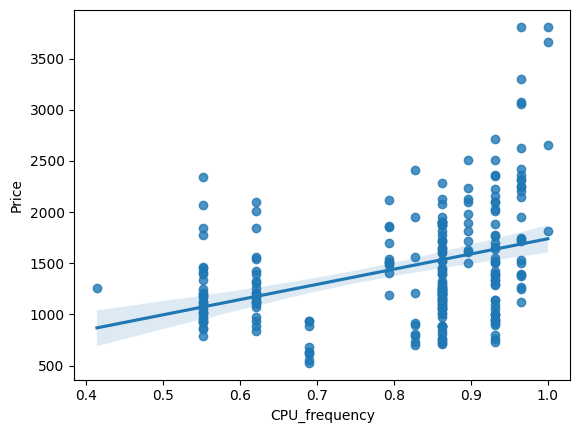

In [ ]:
# Let's Visualize the data of certain columns
# Make regression graphs of 'CPU_frequency' and 'price'
sns.regplot(x= 'CPU_frequency', y= 'Price', data=df)

<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

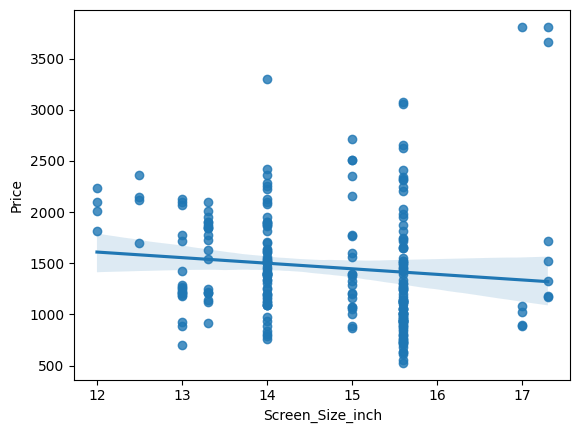

In [ ]:
# Make regression graphs of 'Screen_Size_inch' and 'price'
sns.regplot(x= 'Screen_Size_inch', y= 'Price', data=df)

<Axes: xlabel='Weight_pounds', ylabel='Price'>

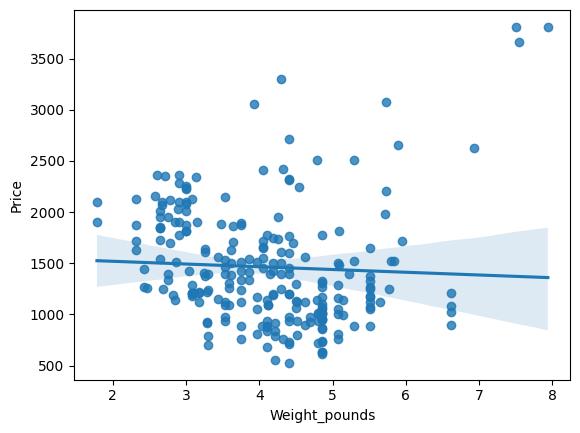

In [ ]:
# Make regression graph of 'Weight_pounds' and 'Price'
sns.regplot(x= 'Weight_pounds', y= 'Price', data=df)

In [ ]:
# Look at the correlation of the three attributes with the price
for param in ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds', 'Price']:
    print(f"correlation of Price and {param} is ", df[[param, "Price"]].corr())

correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000
correlation of Price and Price is         Price  Price
Price    1.0    1.0
Price    1.0    1.0


<Axes: xlabel='Category', ylabel='Price'>

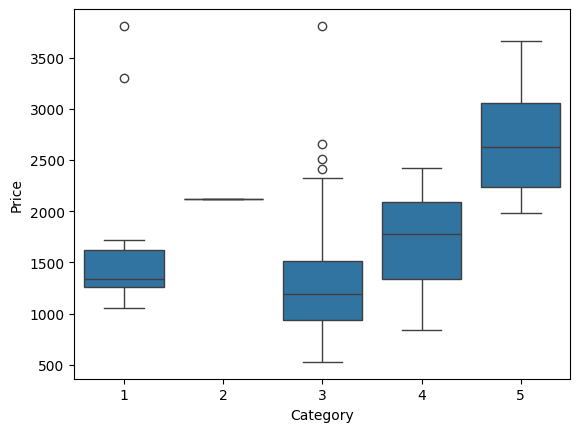

In [ ]:
# Now let's take a look to categorical features
# We wwill start with 'Category'
sns.boxplot(x= 'Category', y= 'Price', data=df)

<Axes: xlabel='GPU', ylabel='Price'>

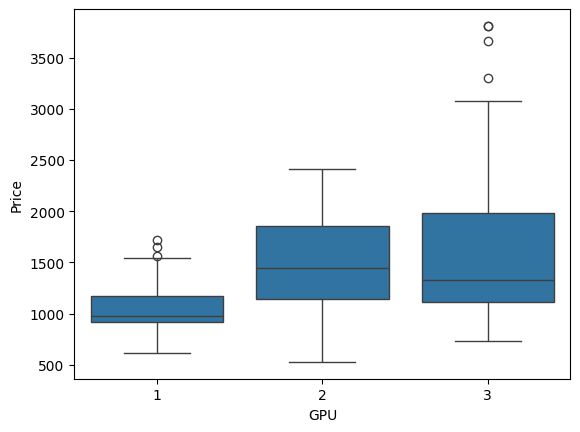

In [ ]:
#Now we move to the Gpu box plot
sns.boxplot(x = 'GPU', y= 'Price', data=df)

<Axes: xlabel='OS', ylabel='Price'>

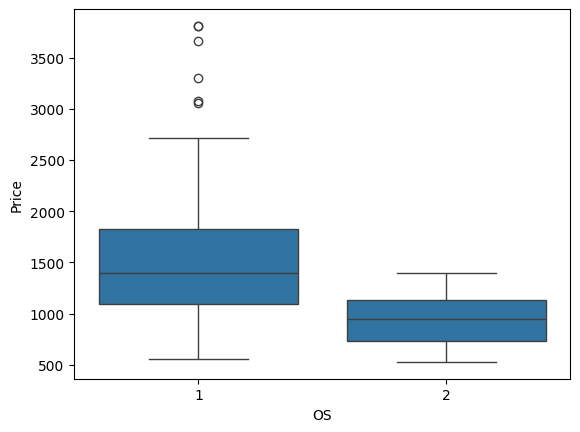

In [ ]:
# We move on ot the OS box plot
sns.boxplot(x= 'OS', y= 'Price', data = df)

<Axes: xlabel='CPU_core', ylabel='Price'>

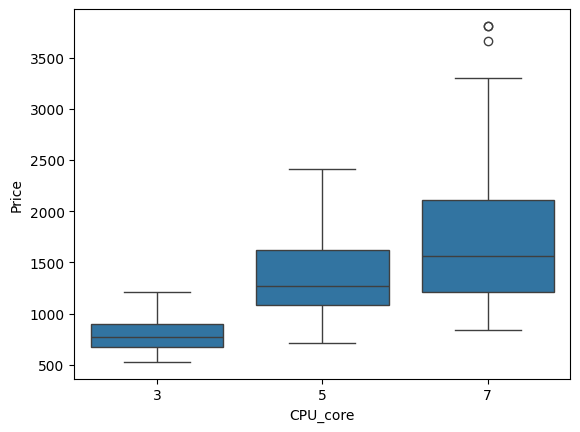

In [ ]:
# Now let's look at the CPU_core box plot
sns.boxplot(x= 'CPU_core', y= 'Price', data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

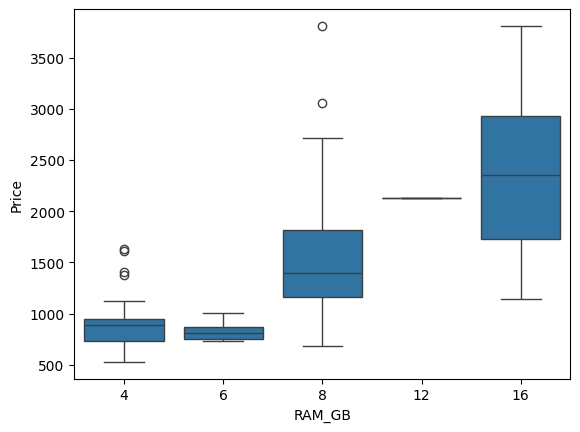

In [ ]:
# Now let's take a look at the RAM_GB
sns.boxplot(x= 'RAM_GB', y= 'Price', data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

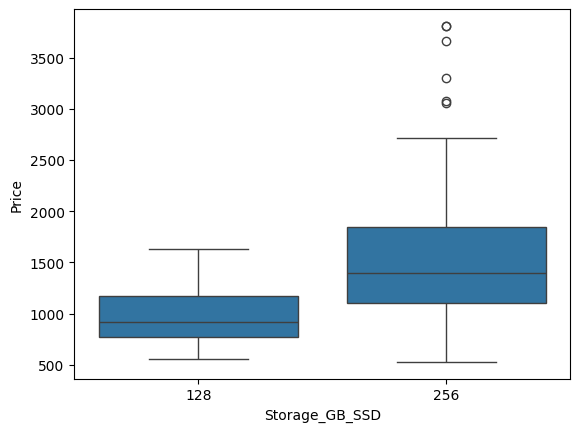

In [ ]:
# Finally, let's take a look at the Storage_GB_SSD
sns.boxplot(x= 'Storage_GB_SSD', y= 'Price', data=df)

In [ ]:
#Let's get the statistical description of all features, including 'object'

print(df.describe())
print(df.describe(include= ['object']))

       Unnamed: 0.1  Unnamed: 0    Category         GPU          OS  \
count    238.000000  238.000000  238.000000  238.000000  238.000000   
mean     118.500000  118.500000    3.205882    2.151261    1.058824   
std       68.848868   68.848868    0.776533    0.638282    0.235790   
min        0.000000    0.000000    1.000000    1.000000    1.000000   
25%       59.250000   59.250000    3.000000    2.000000    1.000000   
50%      118.500000  118.500000    3.000000    2.000000    1.000000   
75%      177.750000  177.750000    4.000000    3.000000    1.000000   
max      237.000000  237.000000    5.000000    3.000000    2.000000   

         CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count  238.000000        238.000000     238.000000  238.000000   
mean     5.630252         14.688655       0.813822    7.882353   
std      1.241787          1.166045       0.141860    2.482603   
min      3.000000         12.000000       0.413793    4.000000   
25%      5.000000         14.0

In [ ]:
# Group the parameters "GPU", "CPU_core" and "Price"
df_gptest = df[['GPU','CPU_core', 'Price']]
grouped_test_1 = df_gptest.groupby(['GPU','CPU_core'], as_index= False).mean()
grouped_test_1

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [ ]:
# Create the pivot table
grouped_pivot = grouped_test_1.pivot(index = 'GPU', columns = 'CPU_core')
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

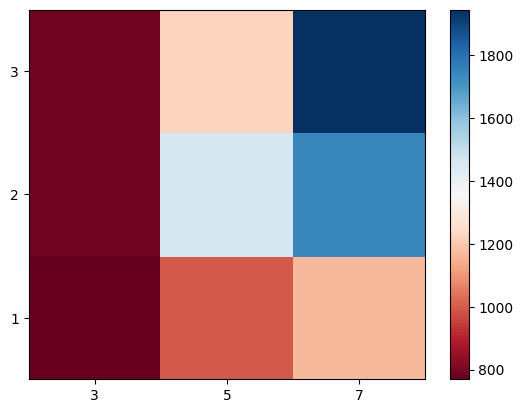

In [ ]:
# Create the plot

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#Move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#Rotate label if too long
plt.xticks(rotation=0)

fig.colorbar(im)
plt.show()

In [ ]:
# Use the scipy.stats.pearsonr() to evaluate the pearson coefficient and the p-values for each parameter
# This will help to determine parameters that can inlfuence the effect on the price of laptops

for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857844  with a P-value of P = 3.6815606288428415e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588604  with a P-value of P = 5.502463350713357e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.243420755218103  with a P-value of P = 0.0001489892319172414
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118266  with a P-value of P = 0.08853397846830661
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751549  with a P-value of P = 0.4397693853433896
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.4593977773355115  with a P-value of P = 7.912950127009183e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827384  with a P-value of P = 0.0005696642559246719
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881427  with

## Part 2: Model Development: Used Cars

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(url, header = 0)

### Linear Regression and multiple Linear regression:

Simple Linear Regression
Simple Linear Regression is a method to help us understand the relationship between two variables:

- The predictor/independent variable (X)

- The response/dependent variable (that we want to predict)(Y)


The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.


                      Yhat = a + bX

- a refers to the intercept of the regression line, in other words: the value of Y when X is 0

- b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

In [ ]:
#Create linear regression
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
df.dtypes

,0
symboling,int64
normalized-losses,int64
make,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64
length,float64


In [ ]:
#Let's see how highway-mpg help us predict car price
X = df[['highway-mpg']]
Y = df['price']

# Fit linear model
lm.fit(X,Y)

# Output the prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [ ]:
# Value of intercept a
lm.intercept_

np.float64(38423.3058581574)

In [ ]:
# Value of the slope
lm.coef_

array([-821.73337832])

### Obtenemos que:

**Price** = 38423.31 - 821.73 x **highway-mpg**

In [ ]:
# Let's create another linear regression obj called lm1
lm1 = LinearRegression()
lm1


LinearRegression()

In [ ]:
# Train the model using 'engine-size' as the independent variable and 'price' as the dependent
X = df[['engine-size']]
Y = df['price']

# Fit linear model
lm1.fit(X,Y)

# Output the prediction
Yhat = lm1.predict(X)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [ ]:
# Print the intercept
print(lm1.intercept_)

#Print the slope
print(lm1.coef_)

-7963.338906281042
[166.86001569]


### Multiple linear regression:

What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables.

Equation is given by:

- **Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4**



In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

# Fit the linear model using the four above-mentioned variables
lm.fit(Z, df['price'])

# What is the value of the intercept(a)
print(lm.intercept_)

# What are the values of the coeficients
print(lm.coef_)

-15806.62462632922
[53.49574423  4.70770099 81.53026382 36.05748882]


### What is the linear function we get in this example?

#### Multiple linear model

**Price** = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

In [ ]:
# Now ltet's make a multiple linear model lm2
lm2 = LinearRegression()
Z1 = df[['normalized-losses', 'highway-mpg']]

# Fit the linear model
lm2.fit(Z1, df['price'])

# What is the value of the intercept(a)
print(lm2.intercept_)

# What are the values of the coeficients
print(lm2.coef_)

38201.31327245728
[   1.49789586 -820.45434016]


In [ ]:
# Now we are going to visualize
import seaborn as sns
%matplotlib inline

(0.0, 48162.9537726922)

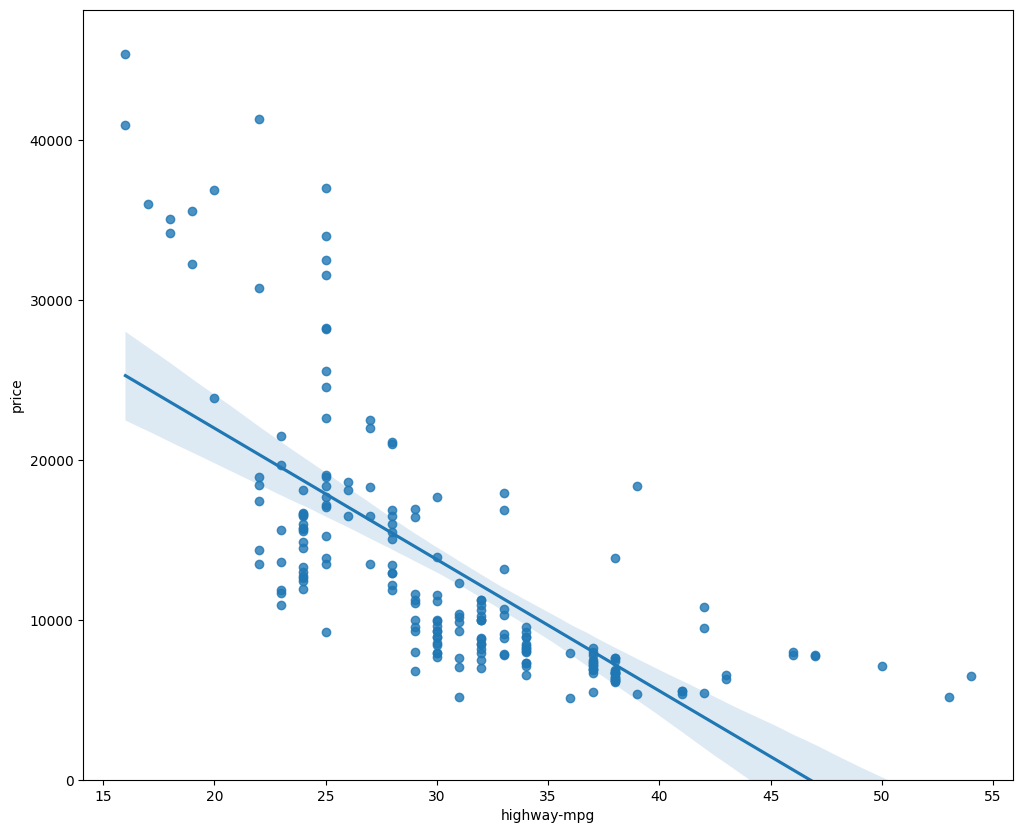

In [ ]:
# Regression plot. Let's look at highway-mpg

width = 12
height = 10
plt.figure(figsize= (width, height))
sns.regplot( x= 'highway-mpg', y='price', data=df)
plt.ylim(0,)

(0.0, 47414.1)

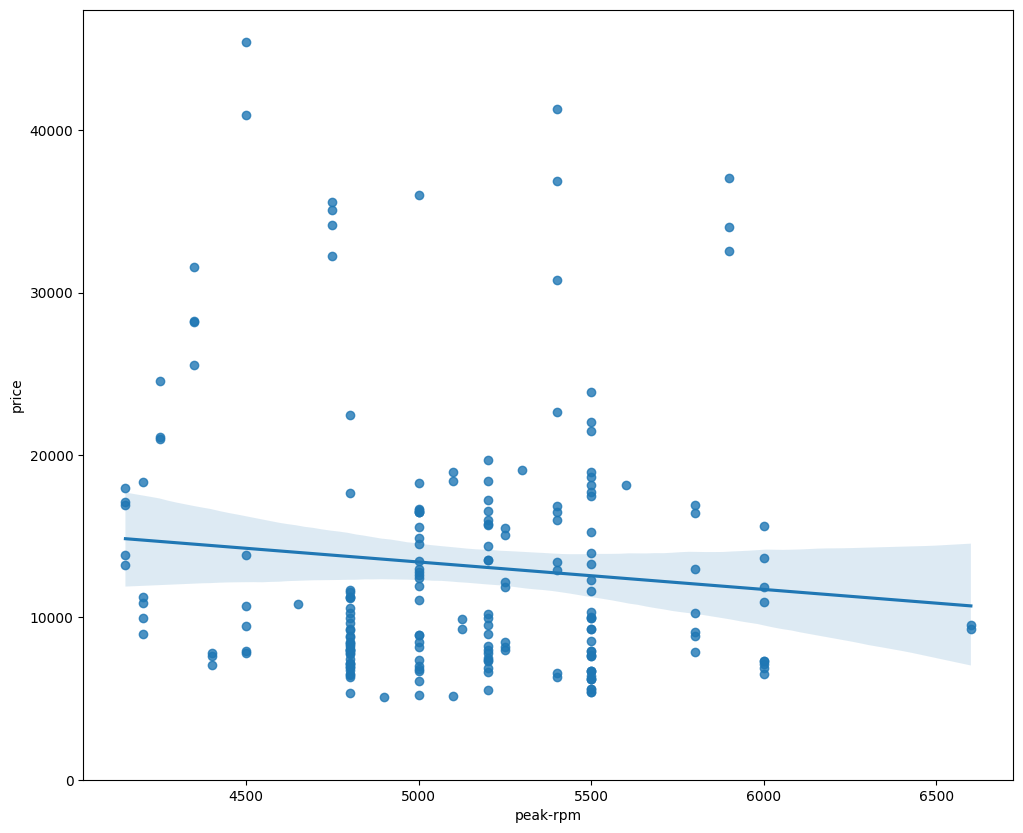

In [ ]:
# Now let's take a look to the peak-rpm
plt.figure(figsize= (width, height))
sns.regplot(x= 'peak-rpm', y= 'price', data=df)
plt.ylim(0,)

In [ ]:
df[['peak-rpm', 'highway-mpg', 'price']].corr()
# We conclude that price has a higher correlation with highway-mpg

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual plot:

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data

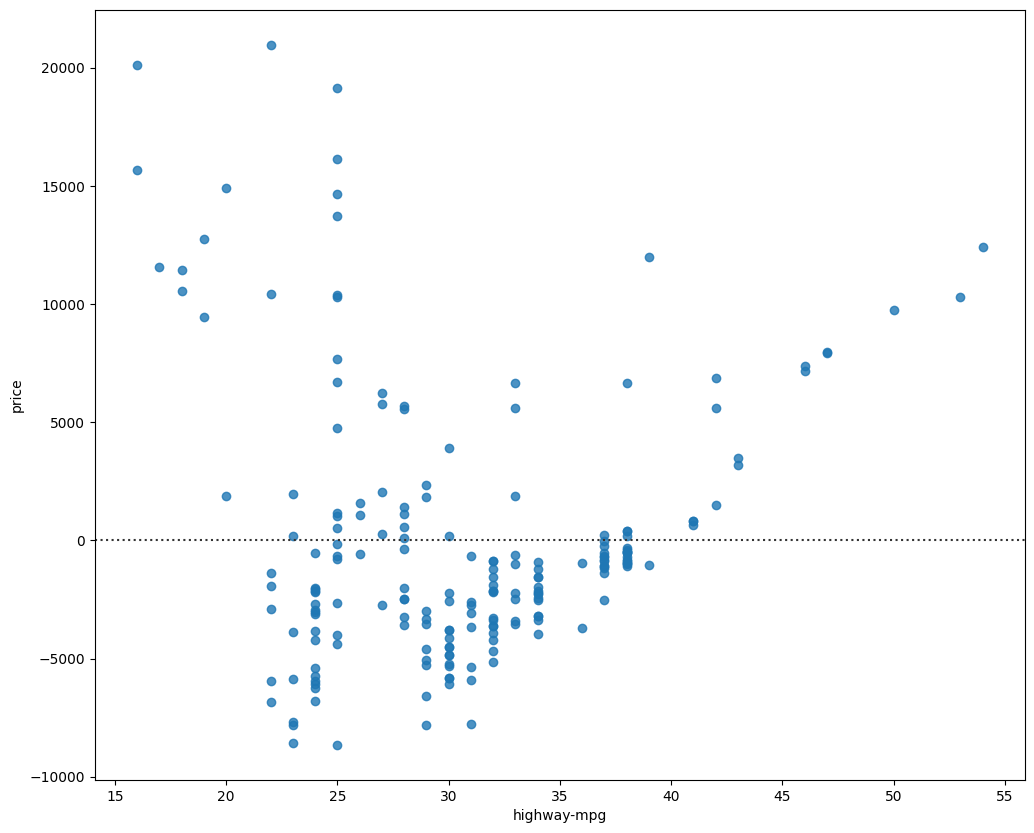

In [ ]:
#Residual plot
weight = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [ ]:
y_hat = lm.predict(Z)

/tmp/ipython-input-80-1673064315.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  zx1 = sns.distplot(df['price'], hist= False, color='r', label='Actual Value')
/tmp/ipython-input-80-1673064315.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  zx2 = sns.distplot(y_hat, hist= False, color='b', label=

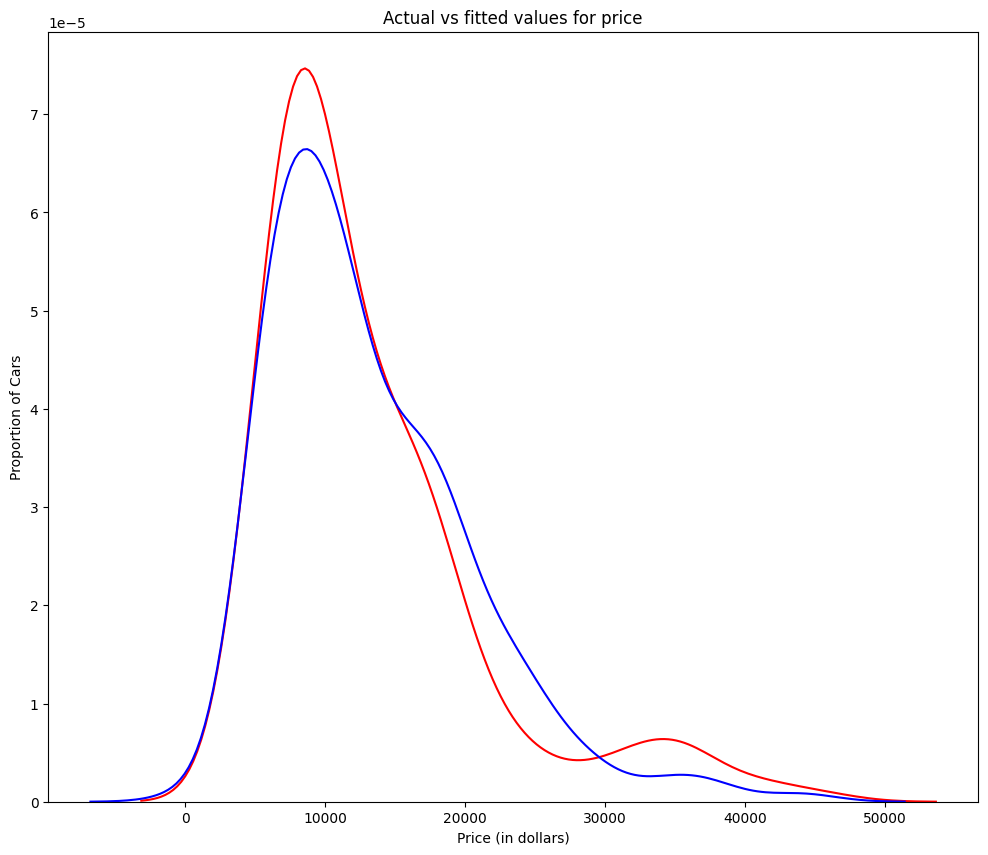

In [ ]:
plt.figure(figsize=(width, height))

zx1 = sns.distplot(df['price'], hist= False, color='r', label='Actual Value')
zx2 = sns.distplot(y_hat, hist= False, color='b', label='Fitted Values', ax=zx1)

plt.title('Actual vs fitted values for price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Polynomial regression

Is a particular case of the general linear regression model or multiple linear regression models

A linear model did not best fit while using 'highway-mpg' so we can try fitting a polynomial model to the data instead


In [ ]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55,100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
# Let's get the variables
x = df[['highway-mpg']]
y = df['price']

In [ ]:
# We use a polynomial of the 3rd order (cubic)
f = np.polyfit(x['highway-mpg'],y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


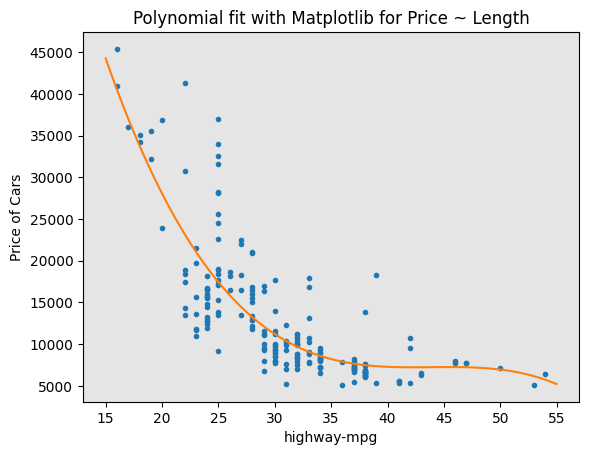

In [ ]:
# Now we are going to plot the function
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
np.polyfit(x['highway-mpg'],y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [ ]:
# Can we make and plot an 11 order polynomial model? yes, yes we can
f = np.polyfit(x['highway-mpg'],y,11)
p = np.poly1d(f)
print((p))

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


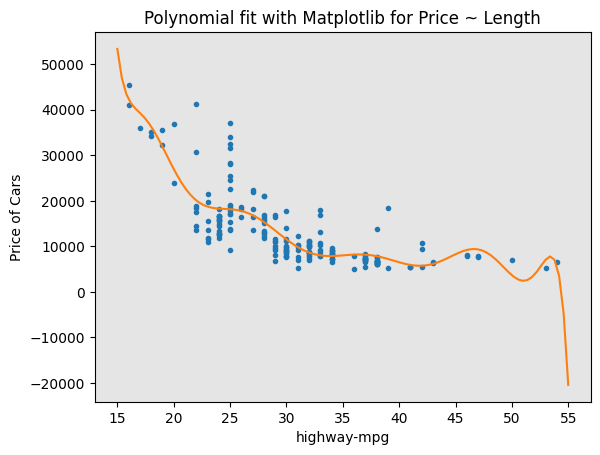

In [ ]:
PlotPolly(p,x,y, 'highway-mpg')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# We creare polynomial features of 2nd degree
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z_pr= pr.fit_transform(Z)

In [ ]:
# In the og data, there are 201 samples and 4 features
Z.shape

(201, 4)

In [ ]:
# Now we have 201 samples and 15 features
Z_pr.shape

(201, 15)

### Pipelines

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# We create a pipeline by making a list of tuples including name of the model or estimator
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [ ]:
# We input the list as an argument to the pipeline
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
Z = Z.astype(float) #Convert to type float to avoid conversion warnings
pipe.fit(Z,y) #Then normalize the data, perfeorm a transform and fit the model

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
# We can normlize data, perform a trasnform anf produce a prediction at the same time
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [ ]:
Input = [('scale', StandardScaler()), ('model', LinearRegression())]

pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,y)
ypipe = pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

### Measuers for in sample Evaluation

**R-squared**

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

**Mean squared Error (MSE)**
The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ)


In [ ]:
 # Calculate the R^2
 lm.fit(X , Y)
 # Find R^2
 print(f'The R-square Is {lm.score(X,Y)}')

The R-square Is 0.7609686443622008


In [ ]:
#Calculate the mse
Yhat = lm.predict(X)
print(f'The output of the first four predicted value is {Yhat[0:4]}')

The output of the first four predicted value is [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


In [ ]:
#Import mean_squred_error
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(df['price'], Yhat)
print(f'The mean squared error of price and predicted value is: {mse}')

The mean squared error of price and predicted value is: 15021126.025174143


### Model 2: Multiple linear regression

In [ ]:
# Calculate R^2
lm.fit(Z, df['price'])
# Find R^2
print(f'The R-square is: {lm.score(Z, df["price"])}')

The R-square is: 0.8093562806577457


In [ ]:
#Calculate the mse
Y_predcit_multifit = lm.predict(Z)

In [ ]:
#Compate the predicted with the actual results
print(f'The output of the first four predicted value is {mean_squared_error(df["price"], Y_predcit_multifit)}')

The output of the first four predicted value is 11980366.87072649


### Model 3: Polynomial Fit

In [ ]:
#Import the R2_score since function is different
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y, p(x))
print(f'The R-squred value is {r_squared}') #That is the variation of price explained

The R-squred value is 0.7023769093756598


In [ ]:
#MSE
mean_squared_error(df['price'], p(x['highway-mpg']))

18703127.63085496

### Prediction and decision making

In the prev section, we trained the model using the method fit. Now we will use the method predict to produce predictions

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
# Create new input
new_input = np.arange(1, 100, 1).reshape(-1,1)

In [ ]:
# fit the model
lm.fit(X,Y)
lm

LinearRegression()

In [ ]:
yhat= lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

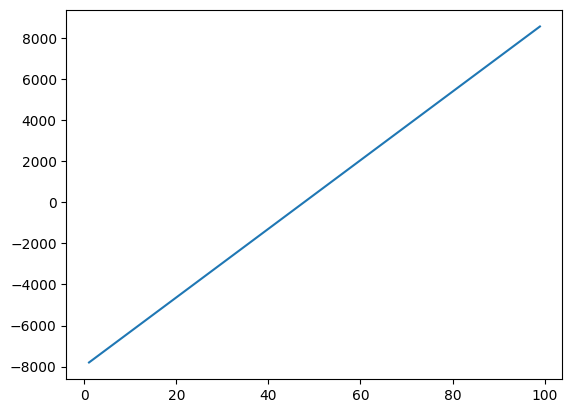

In [ ]:
plt.plot(new_input, yhat)
plt.show()

### Decision making: determining a good fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

What is a good R-squared value?

When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?

When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.

Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759
MSE: 3.16 x10^7

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497
MSE: 1.2 x10^7

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514
MSE: 2.05 x 10^7

### Conclusion

Comparing the three models, we conclude that the mUltiple linear regression is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of the variables are potential predictors of the final car price

## Second practice: Laptop pricing

In [ ]:
# Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
%matplotlib inline

In [ ]:
url =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(url, header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


### Single linear regression

In [ ]:

''' Cpu Freq is the parameter with the lowets p-vale among differetn features.
    We have to create a single Feature linear regression model that fits the
    pair of "CPU_frequency and "Price" to find the model for prediction ''';


lm = LinearRegression()
X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)
Yhat = lm.predict(X)
Yhat[0:5]



array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057])

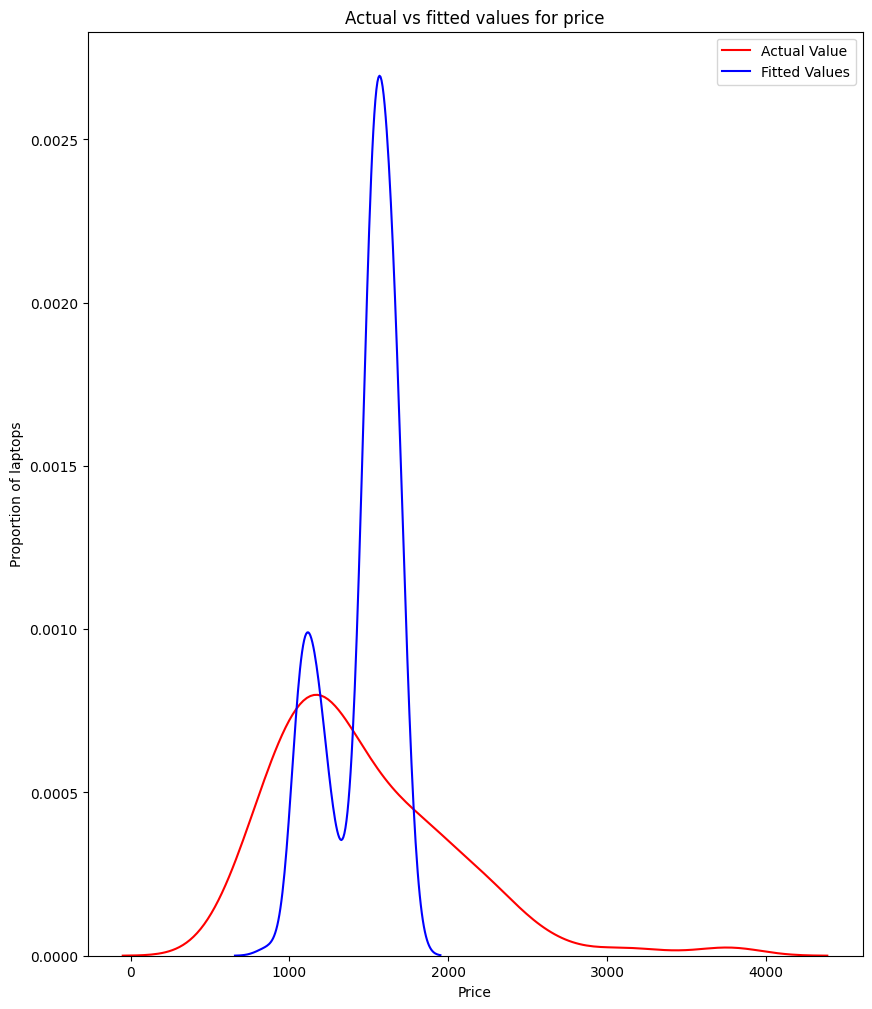

In [ ]:
''' Generate the distribution plot for the predicted values and that of the
actual values. How well did the model perform? ''';

plt.figure(figsize=(10,12))

ax1 = sns.distplot(df['Price'], hist = False, color='r', label='Actual Value')

#Dist plot for the predicted values
sns.distplot(Yhat, hist= False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual vs fitted values for price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Fitted Values'])
plt.show()

In [ ]:
''' Evaluate the MSE and R^2 score values for the model ''';
# Calculate the R^2
r2_score_slr = lm.score(X,Y)
# Find R^2
print(f'The R-square Is {r2_score_slr}')

# Find MSE
mse_slr = mean_squared_error(df['Price'], Yhat)
print(f'The output of the first four predicted value is {mse_slr}')

The R-square Is 0.1344436321024326
The output of the first four predicted value is 284583.4405868629


### Multiple linear regression

In [ ]:
'''The parameters which have a low enough p-value so as to indicate strong
relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB',
'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these
variables to create a Multiple Linear Regression system. ''';

#Create the model for the prediction

lm2 = LinearRegression()
Z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
Y = df['Price']
lm2.fit(Z, Y)
y_hat = lm2.predict(Z)
y_hat[0:5]

array([1345.51622771,  710.44905496, 1552.37242687, 1295.00681012,
       1543.13847022])

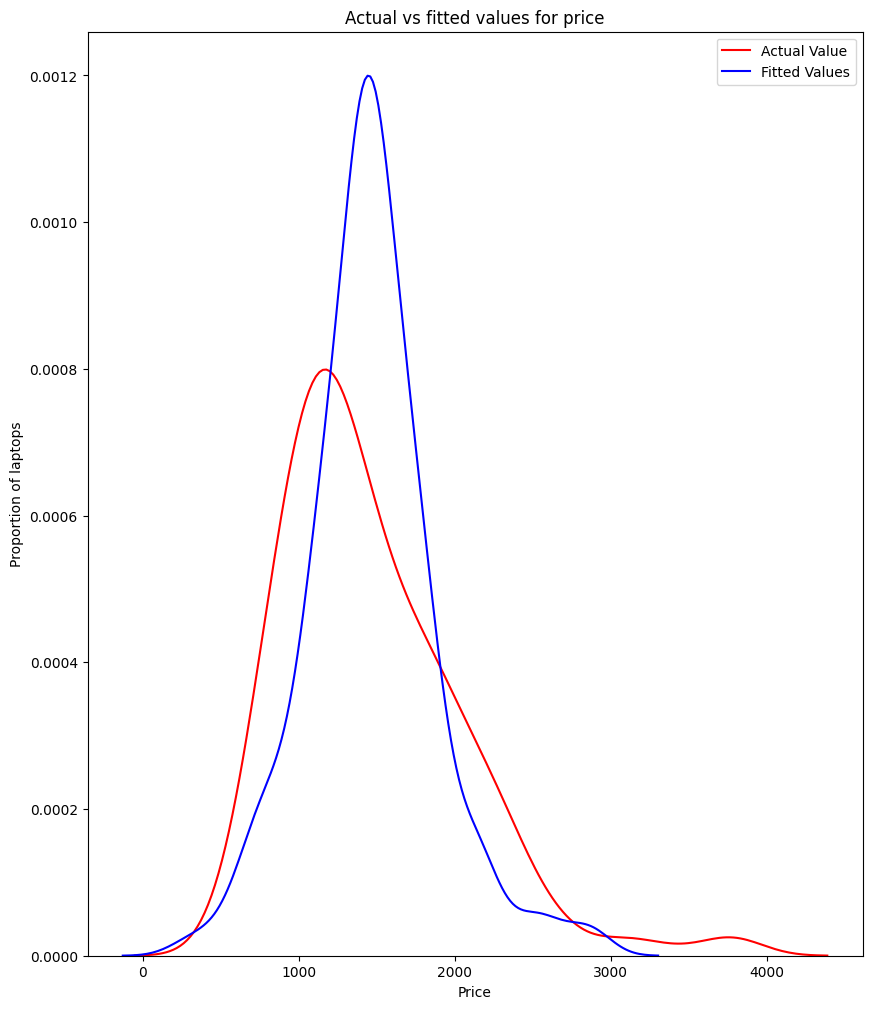

In [ ]:
''' Plot the distribution graph of the predicted values and the actual values.
    How well did the model perform? ''';

plt.figure(figsize=(10,12))

bx1 = sns.distplot(df['Price'], hist = False, color ='r', label = 'Actual Value')
bx2 = sns.distplot(y_hat, hist= False, color='b', label='Fitted Values', ax=bx1)

plt.title('Actual vs fitted values for price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Fitted Values'])
plt.show()

In [ ]:
''' Find the R^2 and MSE values for the model ''';
# Calculate the R^2
r2_score_mlr = lm2.score(Z,Y)
# Find R^2
print(f'The R-square Is {r2_score_mlr}')

# Find the MSE
mse_mlr = mean_squared_error(df['Price'], y_hat)
print(f"The output of the first four predicted value is {mse_mlr}")

The R-square Is 0.5082509055187374
The output of the first four predicted value is 161680.57263893107


### Polynomial model

In [ ]:
''' Use the variable "CPU_frequency" to create Polynomial features.
Try this for 3 different values of polynomial degrees. Remember that polynomial
 fits are done using numpy.polyfit''';

# First we flatten
X = X.to_numpy().flatten()


#Now create the orders
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

In [ ]:
''' Plot the regression output against the actual data points to note how the
data fits in each case. To plot the polynomial response over the actual data
points, you have the function shown below.''';

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

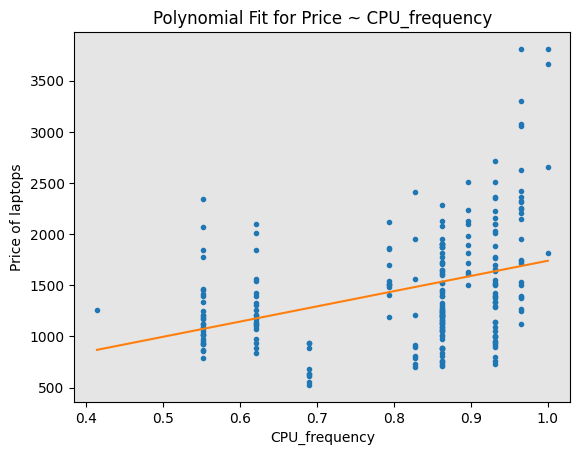

In [ ]:
PlotPolly(p1, X, Y, 'CPU_frequency')

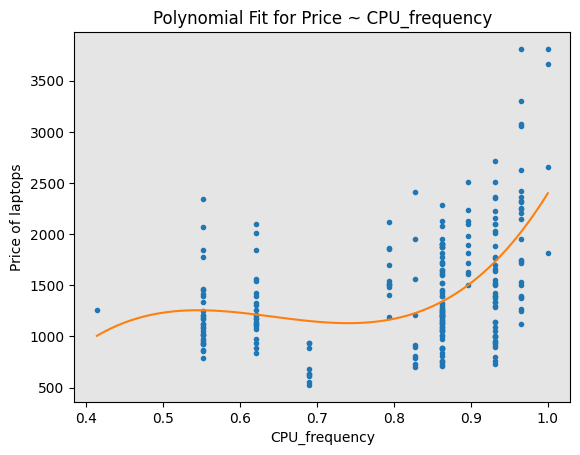

In [ ]:
PlotPolly(p3, X, Y, 'CPU_frequency')

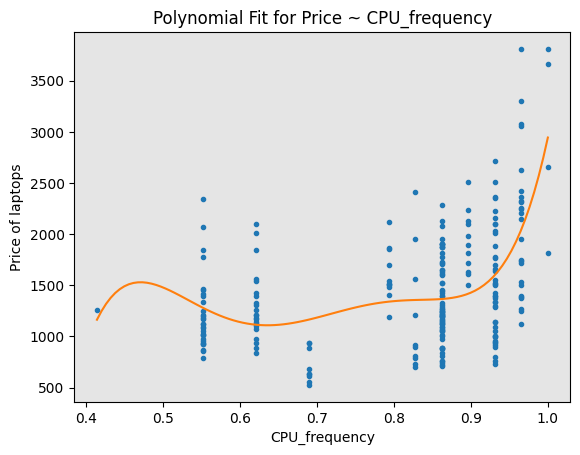

In [ ]:
PlotPolly(p5, X, Y, 'CPU_frequency')

In [ ]:
''' Also, calculate the R^2 and MSE values for these fits. For polynomial
functions, the function sklearn.metrics.r2_score will
be used to calculate R^2 values.''';

# We start with p1
r2_squared_p1 = r2_score(Y, p1(X))
print(f"The R-squared value for the first order polynomial model is {r2_squared_p1}")
# And the MSE
mse_p1 = mean_squared_error(Y, p1(X))
print(f"The MSE value for the first order polynomial model is {mse_p1}")

#Now p3
r2_suqared_p3 = r2_score(Y, p3(X))
print(f"The R-squared value for the third order polynomial model is {r2_suqared_p3}")

# MSE
mse_p3 = mean_squared_error(Y, p3(X))
print(f"The MSE value for the third degree polynomialmodel is {mse_p3}")

# Now p5
r2_squared_p5 = r2_score(Y, p5(X))
print(f"The R-squared value for the fifth order polynomial model is {r2_squared_p5}")

#And MSE
mse_p5 = mean_squared_error(Y, p5(X))
print(f"The MSE value for the fifth order polynomial model is {mse_p5}")

The R-squared value for the first order polynomial model is 0.1344436321024326
The MSE value for the first order polynomial model is 284583.4405868629
The R-squared value for the third order polynomial model is 0.26692640796531175
The MSE value for the third degree polynomialmodel is 241024.86303848747
The R-squared value for the fifth order polynomial model is 0.3030822706443108
The MSE value for the fifth order polynomial model is 229137.2954805611


### Pipelines

In [ ]:
'''Create a pipeline that performs parameter scaling, Polynomial Feature
generation and Linear regression. Use the set of multiple features as
before to create this pipeline''';

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype(float) #Avoid comparisons
pipe.fit(Z, Y)
ypipe = pipe.predict(Z)

In [ ]:
# Evaluate MSE and R^2 for this predicted output
r2_squared_pipe = r2_score(Y, ypipe)
print(f"The R-squared value fot the multi-variable polynomial pipeline is {r2_squared_pipe}")

# MSE
mse_pipe = mean_squared_error(Y, ypipe)
print(f"The MSE value for the multi-variable polynomial pipeline is  {mse_pipe}")

The R-squared value fot the multi-variable polynomial pipeline is 0.6332094535859659
The MSE value for the multi-variable polynomial pipeline is  120595.8612802837
